## <center>Лабораторная работа 3</center>
#### Вариант 22 Гончаров Г. И.

In [1]:
len('Гончаров Глеб Игоревич') % 3022

22

In [2]:
import numpy as np

#### Задача 3.1. 
Дана система уравнений Ax=b порядка n=5. Исследовать зависимость погрешности решения x от погрешностей правой части системы b. $$a_{ij}=\frac{150}{13c^3 +777c}, c=c_{ij}=2.2*i*j, b_{i}=22$$

Построим и вывыведем нашу матрицу

In [3]:
n = 5
B = np.array([22.0] * n)
C, A = np.ones((n,n)), np.ones((n,n))
for i in range(n):
    for j in range(n):
        C[i][j] = 2.2 * (i + 1) * (j + 1)
        A[i][j] = 150 / (13 * C[i][j] ** 3 + 777 * C[i][j])
print(A)

[[8.11765623e-02 3.31404412e-02 1.69192370e-02 9.55612683e-03
  5.80270793e-03]
 [3.31404412e-02 9.55612683e-03 3.73543330e-03 1.77413409e-03
  9.64518577e-04]
 [1.69192370e-02 3.73543330e-03 1.28981557e-03 5.77568461e-04
  3.04369529e-04]
 [9.55612683e-03 1.77413409e-03 5.77568461e-04 2.52382871e-04
  1.31396836e-04]
 [5.80270793e-03 9.64518577e-04 3.04369529e-04 1.31396836e-04
  6.80083968e-05]]


Нашли решение с помощью встроенной функции numpy

In [4]:
x = np.linalg.solve(A,B)
print(x)

[ 6.12459681e+04 -2.97214518e+06  3.14972246e+07 -9.81621158e+07
  8.59407521e+07]


Найдем число обусловленности. Я не оч понимаю, по какой норме нашли, но нашли. вроде бы это котора про сингулярое число

In [5]:
condA = np.linalg.cond(A,np.inf)
print(condA)

8422543.146725489


Видим, что задача плохо обусловлена, поэтому колебания ответов должны быть большими

Рассмотрим погрешности вектора В, которые равные 0.01% от максимального значения (0.022)

In [6]:
#Рассмотрим погрешности вектора В, равныe 0.1% от значения В
eps = 0.022
x_eps = np.ones((5,5))
for i in range(n):
    B_eps = B.copy()
    B_eps[i] += eps
    print(B_eps)
    x_eps[i] = np.linalg.solve(A,B_eps)

[22.022 22.    22.    22.    22.   ]
[22.    22.022 22.    22.    22.   ]
[22.    22.    22.022 22.    22.   ]
[22.    22.    22.    22.022 22.   ]
[22.    22.    22.    22.    22.022]


Тут я немного не понимаю, какую норму использовать.

In [7]:
# idk what norm to choose. So standart np euclidian (i hope) norm is here.
delta = np.array([0.0] * n)
for i in range(n):
    delta[i] = np.linalg.norm((x - x_eps)[i]) / np.linalg.norm(x)
print(delta)
print('Индекс максимального элемента: ', delta.argmax() + 1)
print('Значение максимального элемента: ', delta.max())

[2.52595762e-06 1.59488934e-04 1.81391944e-03 5.80736334e-03
 5.15040397e-03]
Индекс максимального элемента:  4
Значение максимального элемента:  0.005807363336827501


In [8]:
#So norm is inf
delta = np.array([0.0] * n)
for i in range(n):
    delta[i] = np.max(np.abs(x - x_eps)[i]) / np.max(np.abs(x))
print(delta)
print('Индекс максимального элемента: ', delta.argmax() + 1)
print('Значение максимального элемента: ', delta.max())

[2.45170178e-06 1.56474216e-04 1.79897039e-03 5.78184697e-03
 5.13698486e-03]
Индекс максимального элемента:  4
Значение максимального элемента:  0.005781846965201137


Получили, что четвертый елемент вектора В больше всего влияет на погрешность. 

In [9]:
condA * np.max(np.abs(B_eps - B)) / np.max(B)

8422.543146724902

Получилось, что фактическая погрешность намного меньше того, что получилось на практике. Это странно, но противоречия нет

### Задание 2. 
<b>Задание 3.4</b>
Решить систему из задания 1 LU-разложением. ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Используя встроенную функцию lu(A) пакета MATHCAD (либо scipy.linalg.lu_factor), получить LU- разложение матрицы A.
2. Преобразовать вектор b по формулам прямого хода метода Гаусса. С помощью обратной подстановки найти решение системы x.
УКАЗАНИЕ. Функция lu(A) возвращает матрицу, в которой содержатся матрицы P, L и U такие, что PA=LU (P- матрица перестановок).

In [10]:
from scipy.linalg import lu_factor

Проверим, как у нас раскладывает scipy 

In [11]:
lu, p = lu_factor(A)
l, u = np.tril(lu, k=-1) + np.eye(n), np.triu(lu)
ind=[0,1,2,4,3]
np.allclose(A, (l @ u)[ind])

True

Все окей, мы смогли нормально разобраться с библиотекой. 
Найдем Вектор Bnew - вектор Б, после преобразования матрицы А к верхнему треугольному виду. Ну, и да, лучше ис

In [12]:
#Solve(l,b) better than inv
Bnew = np.linalg.inv(l) @ B[ind]
Bnew

array([22.        , 13.01847027,  7.02258981, 10.68957699, -3.74946786])

In [13]:
#Сделали Solv'ом и получили тот же ответ
Bnew = np.linalg.solve(l,B)

In [14]:
unew = np.append(u,Bnew.reshape(5,1),axis=1)
unew.shape

(5, 6)

Верхняя треугольная матрица дополнена стоблцом со свободными членами. Дальше обратный ход метода Гаусса. 

In [16]:
for i in range(n-1,-1,-1):
    unew[i,n] /= unew[i,i]
    unew[i,i] = 1
    for j in range(0,i):
        unew[j,n] -=  unew[j,i] * unew[i,n]
        unew[j,i] = 0

Проверим, близки ли векторы, которые у нас получились

In [17]:
np.allclose(unew[:,5], x)

True

Видим, что все окей, т.к. ответы совпали

### Задание 3
<b>Задание 3.7</b>
Исследовать зависимость числа обусловленности матрицы A из задачи 3.1 от порядка n матрицы.
ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Cоставить программу, выполняющую LU- разложение матрицы произвольного порядка n (схема
единственного деления).
2. Используя составленную программу, для каждого n=1,2,3,..., k (k - максимально возможное
значение, при котором удается решить задачу) найти обратную матрицу A−1 .
3. Вычислить число обусловленности матрицы по формуле cond ( A) = A ⋅ A−1 для каждого
значения n.
4. Построить график зависимости cond(A) от n.

In [18]:
#разложение lu
def lu_factorizer(A):
    shape = A.shape[0]
    l, u = np.eye(shape).astype('float64'), A.copy().astype('float64')
    pivot = np.zeros(shape)
    for i in range(shape):
        #найдем максимальный элемент по строке для и-го столбца
        row, maxelem = i, np.abs(u[i,i])
        for k in range(i+1,shape):
            if (np.abs(u[k,i]) > maxelem):
                maxelem = np.abs(u[k,i])
                row = k
        pivot[i] = row
        #меняем местами строки
        for k in range(i,shape):
            temp = u[i,k]
            u[i,k] = u[row,k]
            u[row,k] = temp
        #Ну, тут вот мы находим l, u методом Гаусса
        for k in range(i+1,shape):
            g = u[k,i] / u[i,i]
            l[k,i] = g
            for j in range(i, shape):
                u[k,j] -= g * u[i,j]        
    return l, u, pivot

In [19]:
#Функция для тестов
def test(A):
    eps = 1e-12
    l, u, p = lu_factorizer(A)
    np_lu, p = lu_factor(A)
    lu = u + np.tril(l, k=-1)
    #У здесь не учитываю перестановки строк, поэтому считаю норму по стоблцу
    if np.abs(np.linalg.norm(l @ u,ord=np.inf) - np.linalg.norm(A, ord=np.inf)) < eps:
        return True
    else:
        return False

In [25]:
#Cделаем тесты на наших матрицах
n=np.arange(2,150)
for m in n:
    C, A = np.ones((m,m)).astype('float64'), np.ones((m,m)).astype('float64')
    for i in range(m):
        for j in range(m):
            C[i][j] = 2.2 * (i + 1) * (j + 1)
            A[i][j] = 150 / (13 * C[i][j] ** 3 + 777 * C[i][j])
    if(not test(A)):
        print('Test ', m,' failed')
#Видим, что все ок

Разложим нашу функцию по на l,u. Найдем обратную матрицу следующим способом
$$A = LU$$
$$E = LUA^{-1}$$
Решим систему $$LY=E$$
А потом систему $$UA^{-1}=Y$$
Решение системы - наш ответ

In [21]:
cond_list=[]
n=np.arange(2,100)
for m in n:
    C, A = np.ones((m,m)), np.ones((m,m))
    for i in range(m):
        for j in range(m):
            C[i][j] = 2.2 * (i + 1) * (j + 1)
            A[i][j] = 150 / (13 * C[i][j] ** 3 + 777 * C[i][j])
    l, u, p = lu_factorizer(A)
    Ainv = np.linalg.solve(u,np.linalg.solve(l, np.eye(l.shape[0])))
    cond = np.linalg.norm(Ainv, np.inf) * np.linalg.norm(A, np.inf)
    cond_list.append(cond)

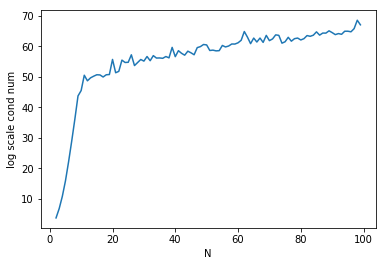

In [23]:
import matplotlib.pyplot as plt
plt.plot(n,np.log(cond_list))
plt.xlabel('N')
plt.ylabel('log scale cond num');